In [1]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Flatten

from keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test,y_test)=mnist.load_data() # load data

In [3]:
# standartisation input data
x_train =x_train / 255
x_test=x_test / 255
# преобразование выходных значений в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

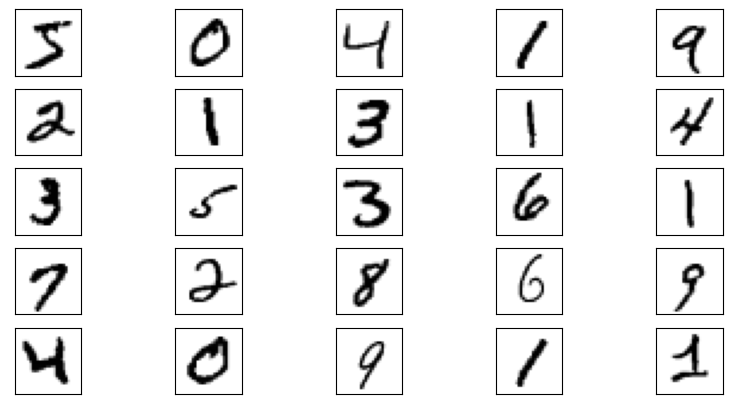

In [4]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))

for i in range(25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(x_train[i], cmap=plt.cm.binary)
   
plt.show()   

In [5]:
# готовим модель для НС
model=keras.Sequential() 
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

print(model.summary()) # вывод структуры НС в консоль


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
# запуск процесса 80% - обучающая выборка, 20% - выборка валидации
model.fit(x_train,y_train_cat,batch_size=32,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2845 - accuracy: 0.9185 - val_loss: 0.1545 - val_accuracy: 0.9547
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1277 - accuracy: 0.9627 - val_loss: 0.1232 - val_accuracy: 0.9647
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9739 - val_loss: 0.1030 - val_accuracy: 0.9693
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0635 - accuracy: 0.9809 - val_loss: 0.0982 - val_accuracy: 0.9690
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0936 - val_accuracy: 0.9726


Для точности используем тест

In [8]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0838 - accuracy: 0.9727


[0.08376108109951019, 0.9726999998092651]

In [9]:
# print("x_test[0]: "+str(x_test.ndim))
# print("x_test[0]: "+str(x_test[1].ndim))
x=np.expand_dims(x_test[1],axis=0)
print("x: "+str(x.shape))
res=model.predict(x)
# print("res: "+str(res.shape))
print(f"Number: {np.argmax(res)}")
# plt.imshow(x_test[x],cmap=plt.cm.binary)
# plt.show()

x: (1, 28, 28)
Number: 2
